# Spectral Clustering

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.neighbors

## 1. EDA

In [2]:
# Load the data
spiral_df = pd.read_csv('Spiral.csv')

In [3]:
# Inspect the data
spiral_df.head()

,id,x,y
0,1,1.390340,-0.018146
1,2,-1.136269,-1.093869
2,3,1.194276,0.205196
3,4,1.666396,0.348524
4,5,0.135881,-1.963015


In [4]:
spiral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
id    100 non-null int64
x     100 non-null float64
y     100 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


### Visualize the distribution of the data

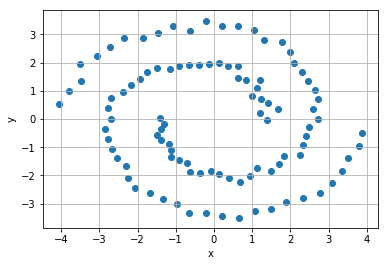

In [5]:
plt.scatter(spiral_df['x'], spiral_df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

It seems that there are 2 clusters.

## 2. Build the K-means model

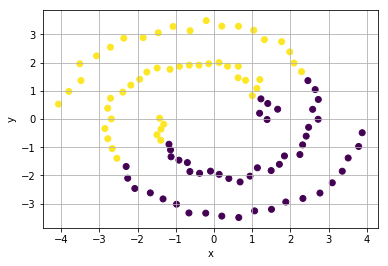

In [6]:
# Create a KMeans instance with 2 clusters: model
model = KMeans(n_clusters=2, random_state=1314)

# Fit the model to points
train_data = spiral_df[['x', 'y']]
model.fit(train_data)

# Add the cluster label column to spiral_df
spiral_df['cluster'] = model.labels_
#spiral_df.head()
#spiral_df.info()

# Regenerate the scatterplot using the K-mean cluster identifier to control the color scheme?
plt.scatter(spiral_df['x'], spiral_df['y'], c=spiral_df['cluster'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

It seems that the number of clusters, 2, does not cluster the data points correctly.

## 3. Use the nearestneighors algorithm to find the optimal number of clusters

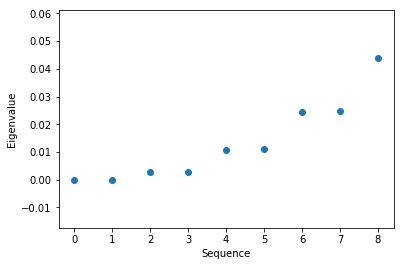

In [9]:
kNNSpec = sklearn.neighbors.NearestNeighbors(n_neighbors=3, algorithm ='brute', metric ='euclidean')
nbrs = kNNSpec.fit(train_data)
d3, i3 = nbrs.kneighbors(train_data)

# Retrieve the distances among the observations
dist_object = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
distances = dist_object.pairwise(train_data)
#print(distances)

# Create the Adjacency matrix
n_objects = spiral_df.shape[0]
#print(n_objects)

Adjacency = np.zeros((n_objects, n_objects))
for i in range(n_objects):
    for j in i3[i]:
        if (i <= j):
            Adjacency[i,j] = math.exp(- distances[i][j])
            Adjacency[j,i] = Adjacency[i,j]

# Create the Degree matrix
Degree = np.zeros((n_objects, n_objects))
for i in range(n_objects):
    sum = 0
    for j in range(n_objects):
        sum += Adjacency[i,j]
    Degree[i,i] = sum
    
# Create the Laplacian matrix 
Laplacian = Degree - Adjacency

# Find the eigenvalues and eigenvectors
evals, evecs = np.linalg.eigh(Laplacian)

# Series plot of the smallest ten eigenvalues to determine the number of clusters
plt.scatter(np.arange(0,9,1), evals[0:9,])
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.show()

There is a jump between 1 and 2, so 2 seems like the optimal number of clusters. All we need to do is to transform the data into Laplcian matrix.

Mean of the first eigenvector: 0.0707106781 , standard deviation: 0.0707106781
Mean of the second eigenvector: -0.0707106781 , standard deviation: 0.0707106781


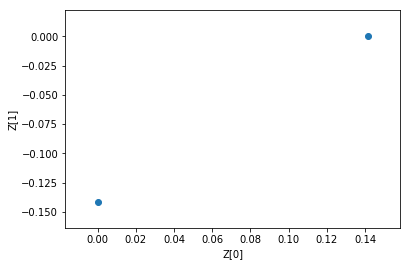

In [10]:
Z = evecs[:,[0,1]]

first_evec_mean = np.round(np.mean(Z[[0]]), 10)
first_evec_std = np.round(np.std(Z[[0]]), 10)
print("Mean of the first eigenvector:", first_evec_mean, ", standard deviation:", first_evec_std)

second_evec_mean = np.round(np.mean(Z[[1]]), 10)
second_evec_std = np.round(np.std(Z[[1]]), 10)
print("Mean of the second eigenvector:", second_evec_mean, ", standard deviation:", second_evec_std)

# plot the first eigenvector on the horizontal axis and the second eigenvector on the vertical axis
plt.scatter(Z[[0]], Z[[1]])
plt.xlabel('Z[0]')
plt.ylabel('Z[1]')
plt.show()

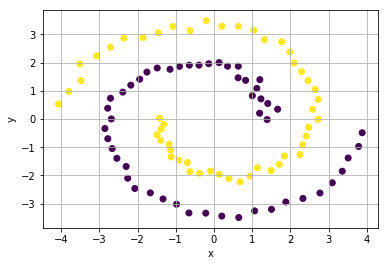

In [11]:
spectral_model = KMeans(n_clusters=2, random_state=0).fit(Z)

spiral_df['cluster'] = spectral_model.labels_

plt.scatter(spiral_df['x'], spiral_df['y'], c = spiral_df['cluster'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()